<a href="https://colab.research.google.com/github/ShabnaIlmi/Data-Science-Group-Project/blob/main/Gradient_Boost_Model_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1269]:
# Installing the relevant libraries - XGBoost
!pip install xgboost

In [1270]:
# Installing the relevant libraries - XAI
!pip install lime
!pip install shap

# **Importing the Necessary Libraries**

In [1271]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import shap
import lime
import pickle
from lime.lime_tabular import LimeTabularExplainer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# **Loading the Dataset**

In [1272]:
# Loading the Dataset
data = pd.read_excel("/content/drive/MyDrive/risk-prediction/Dataset/updated_chemical_import_risk_data.xlsx")

In [1273]:
# Displaying the Dataset Head
data.head()

,Importer_ID,Import_Frequency,Import_Quantity (kg),Chemical_Name,HS Code,Country_of_Origin,Importation_Description,Compliance_History,Past_Violations,Financial_Stability,Risk_Category
0,IMP001,36,5199,"Fluorides; fluorosilicates, fluoroaluminates, ...",282619,Pakistan,Used in aluminum smelting & glass manufacturing,Excellent,4,High,Risky
1,IMP002,26,3398,Sulphuric acid; oleum,280700,Brazil,Petroleum refining & chemical synthesis,Poor,1,High,Not Risky
2,IMP003,47,5626,Sulphuric acid; oleum,280700,India,Petroleum refining & chemical synthesis,Average,5,Medium,Risky
3,IMP004,91,7700,Cyanides and cyanide oxides: Of sodium,283711,India,Gold mining & electroplating industry,Excellent,4,Medium,Not Risky
4,IMP005,63,8377,Nitric acid; sulphonitric acids,280800,China,Used in fertilizer manufacturing & explosives ...,Average,4,Low,Not Risky


# **Exploratory Data Analysis**

In [1274]:
# Displaying Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Importer_ID              100 non-null    object
 1   Import_Frequency         100 non-null    int64 
 2   Import_Quantity (kg)     100 non-null    int64 
 3   Chemical_Name            100 non-null    object
 4   HS Code                  100 non-null    int64 
 5   Country_of_Origin        100 non-null    object
 6   Importation_Description  100 non-null    object
 7   Compliance_History       100 non-null    object
 8   Past_Violations          100 non-null    int64 
 9   Financial_Stability      100 non-null    object
 10  Risk_Category            100 non-null    object
dtypes: int64(4), object(7)
memory usage: 8.7+ KB


### **Identifying Categorical and Numerical Columns**

In [1275]:
# Identifying categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

## **Categorical Features**

In [1276]:
# List of categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# Displaying the categorical features
print("Categorical Features:")
for feature in categorical_features:
    print(f"- {feature}")

# Display data type of the columns
print("\nData Type of Categorical Features:")
print(data[categorical_features].dtypes)

Categorical Features:
- Importer_ID
- Chemical_Name
- Country_of_Origin
- Importation_Description
- Compliance_History
- Financial_Stability
- Risk_Category

Data Type of Categorical Features:
Importer_ID                object
Chemical_Name              object
Country_of_Origin          object
Importation_Description    object
Compliance_History         object
Financial_Stability        object
Risk_Category              object
dtype: object


In [1277]:
# Handling the misintepreted 'HS Code' Column

# Changing the datatype of 'HS Code' to object
data['HS Code'] = data['HS Code'].astype('object')

# Verifying the change
print(data['HS Code'].dtype)

object


In [1278]:
# Displaying Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Importer_ID              100 non-null    object
 1   Import_Frequency         100 non-null    int64 
 2   Import_Quantity (kg)     100 non-null    int64 
 3   Chemical_Name            100 non-null    object
 4   HS Code                  100 non-null    object
 5   Country_of_Origin        100 non-null    object
 6   Importation_Description  100 non-null    object
 7   Compliance_History       100 non-null    object
 8   Past_Violations          100 non-null    int64 
 9   Financial_Stability      100 non-null    object
 10  Risk_Category            100 non-null    object
dtypes: int64(3), object(8)
memory usage: 8.7+ KB


**Unique Values and Their Counts Relevant to Each Categorical Column**

In [1279]:
# List of categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

Importer_ID
IMP001    1
IMP064    1
IMP074    1
IMP073    1
IMP072    1
         ..
IMP031    1
IMP030    1
IMP029    1
IMP028    1
IMP100    1
Name: count, Length: 100, dtype: int64
 
Chemical_Name
Bromine                                                                           12
Chlorine                                                                          11
Chlorates and perchlorates; bromates and perbromates; iodates and periodates      11
Iodine                                                                             9
Mineral or chemical fertilizers, nitrogenous                                       9
Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts     8
Cyanides and cyanide oxides: Other                                                 8
Hydrogen peroxide, whether or not solidified with urea                             8
Sulphuric acid; oleum                                

In [1280]:
# Displaying the categorical columns which contains null values and their counts
print("Categorical columns with null values and their counts:")
for col in categorical_features:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

Categorical columns with null values and their counts:


In [1281]:
# Displaying the categorical columns which contain 'Unknown' values and their relevant counts
print("Categorical columns with 'Unknown' values and their counts:")
for col in categorical_features:
    unknown_count = (data[col] == 'Unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count}")

Categorical columns with 'Unknown' values and their counts:


## **Visualizing the Distribution of the Categorical columns**

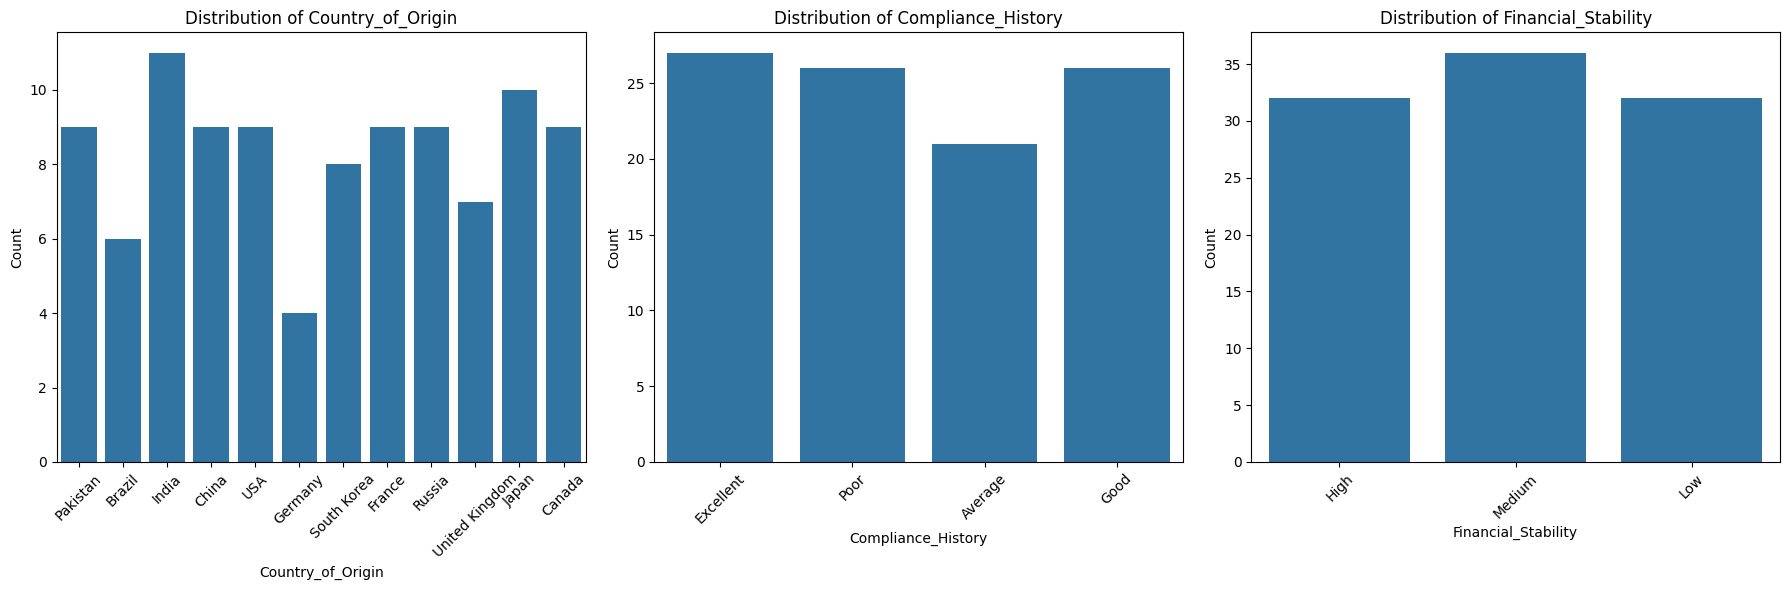

In [1282]:
# List of specific categorical features to visualize
selected_features = ['Country_of_Origin', 'Compliance_History', 'Financial_Stability']

# Create a single row with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(selected_features):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## **Numerical Features**

In [1283]:
# Numerical Features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

# Displaying the Numerical Columns
print("Numerical Features:")
print(numerical_features)

Numerical Features:
Index(['Import_Frequency', 'Import_Quantity (kg)', 'Past_Violations'], dtype='object')


In [1284]:
# Displaying the unique values and their count in the numerical columns
print("Unique values and their count in the numerical columns:\n")
for col in numerical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count in the numerical columns:

Import_Frequency
63     4
66     3
59     3
37     3
100    3
26     3
9      3
25     3
99     3
78     2
19     2
58     2
36     2
21     2
23     2
32     2
52     2
67     2
51     2
73     2
49     2
82     2
57     2
91     2
60     2
33     2
46     2
7      2
47     2
95     2
74     2
62     1
76     1
80     1
96     1
22     1
17     1
15     1
50     1
77     1
84     1
40     1
61     1
70     1
54     1
55     1
11     1
12     1
41     1
5      1
89     1
85     1
87     1
81     1
42     1
83     1
72     1
90     1
68     1
Name: count, dtype: int64
 
Import_Quantity (kg)
5199     1
1557     1
10770    1
16272    1
9028     1
        ..
1793     1
2175     1
18176    1
5145     1
2622     1
Name: count, Length: 100, dtype: int64
 
Past_Violations
4    22
1    19
0    18
3    17
2    14
5    10
Name: count, dtype: int64
 


In [1285]:
# Displaying the numerical columns with null values and their relevant counts
print("Numerical columns with null values and their relevant counts:")
for col in numerical_features:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

Numerical columns with null values and their relevant counts:


## **Visualization of the Correlation HeatMap**

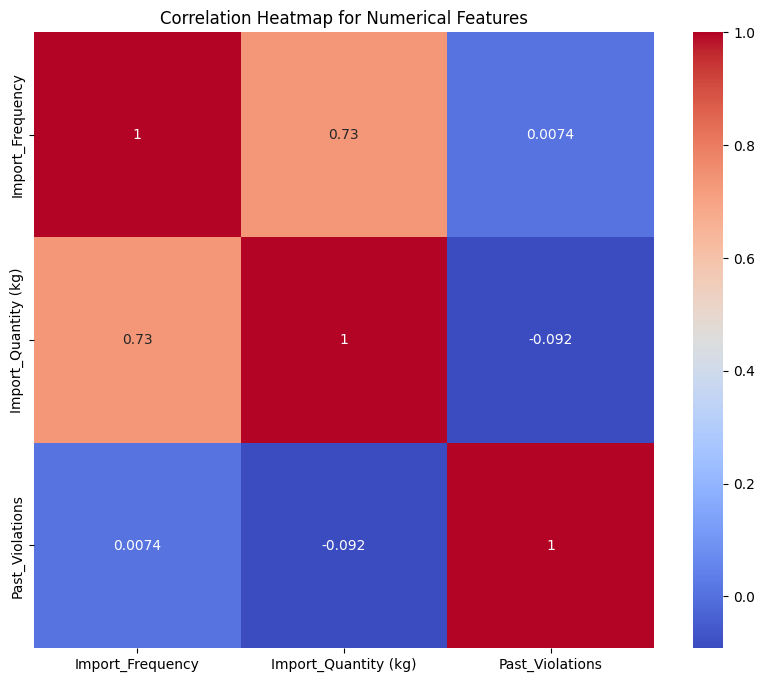

In [1286]:
# Plotting the Correlation HeatMap for the Numerical Features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

## **Handling the Outliers**

## **Visualizing the Outliers**

In [1287]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

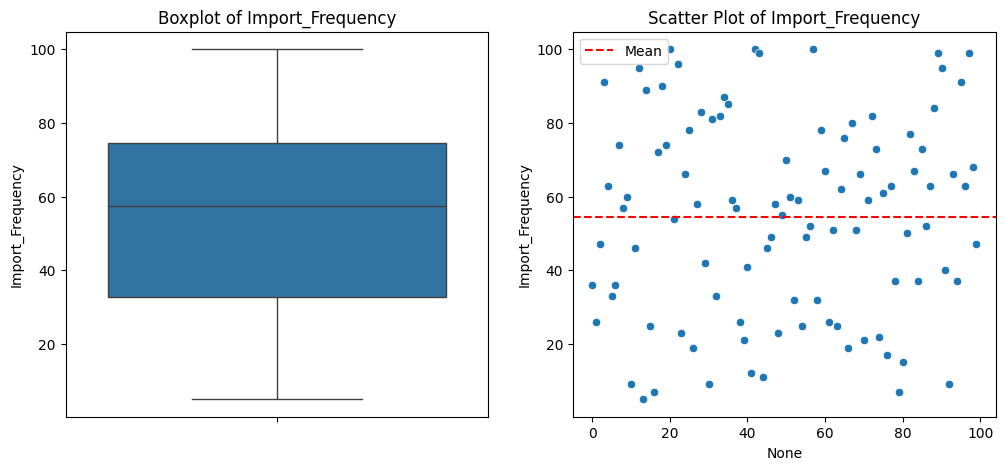

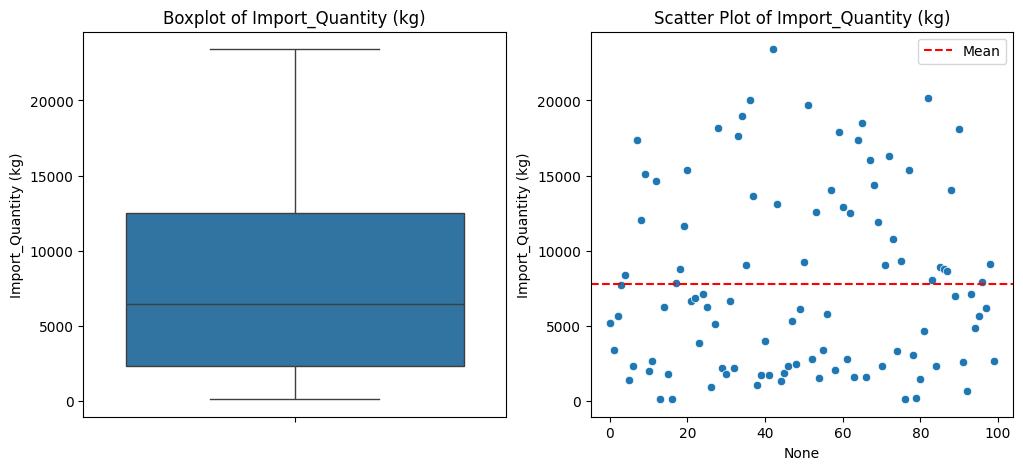

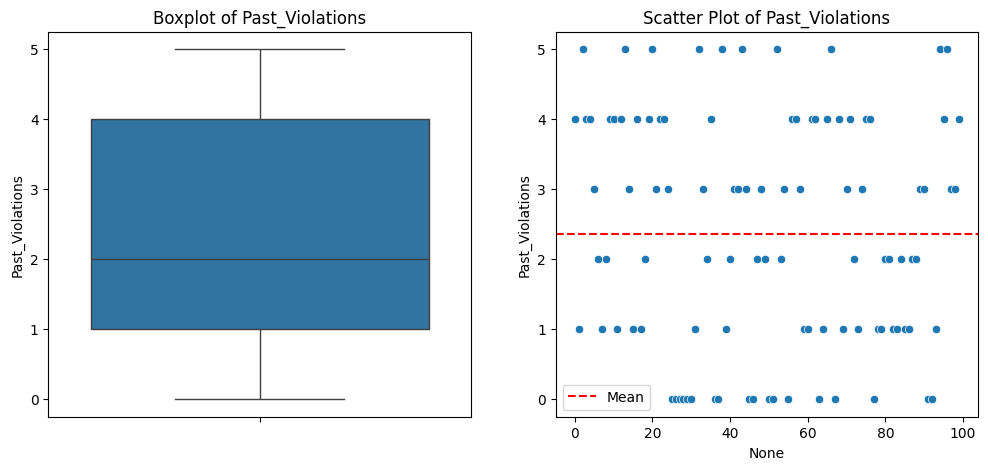

In [1288]:
# Function to visualize outliers using boxplot and scatter plot
def visualize_outliers(data, column):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=data.index, y=data[column])
    plt.axhline(data[column].mean(), color='red', linestyle='dashed', label='Mean')
    plt.title(f'Scatter Plot of {column}')
    plt.legend()

    plt.show()

# Visualize outliers for numerical columns
for col in numerical_features:
    visualize_outliers(pd.DataFrame(data), col)

In [1289]:
# Dictionary to store outliers for each numerical column
outlier_dict = {}

# Detect outliers for each numerical column using IQR
for col in numerical_features:
    outliers_iqr = detect_outliers_iqr(pd.DataFrame(data), col)
    outlier_dict[col] = outliers_iqr

# Display the detected outliers in a structured way
print("=" * 50)
print("          Outlier Detection using IQR")
print("=" * 50)

for col, outliers in outlier_dict.items():
    print(f"\n **{col}** - Outliers detected: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers.to_string(index=False))
    else:
        print(" No outliers detected.")
    print("-" * 50)

          Outlier Detection using IQR

 **Import_Frequency** - Outliers detected: 0
 No outliers detected.
--------------------------------------------------

 **Import_Quantity (kg)** - Outliers detected: 0
 No outliers detected.
--------------------------------------------------

 **Past_Violations** - Outliers detected: 0
 No outliers detected.
--------------------------------------------------


## **Visualizing the Distribution of the Numerical columns**

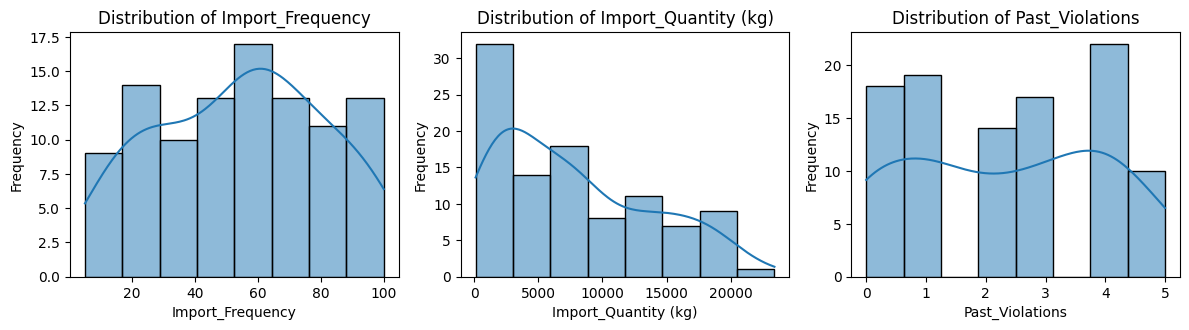

In [1290]:
# Visulaizing the Distribution of the Numerical Features
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

# Displaying the Plot
plt.show()

# **Data Preprocessing**

## **Data Cleaning**

In [1291]:
# Step 1: Removing whitespaces from the object type columns

# List of categorical columns
categorical_cols = ["Chemical_Name", "Country_of_Origin", "Importation_Description", "Compliance_History", "Financial_Stability"]

# Remove leading and trailing whitespaces from object type columns
for col in categorical_cols:
    if data[col].dtype == 'object':
        data[col] = data[col].str.strip()

In [1292]:
# Step 2: Dropping duplicate values
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [1293]:
# Display dataset information
print("\nDataset information after removing duplicates:")
data.info()


Dataset information after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Importer_ID              100 non-null    object
 1   Import_Frequency         100 non-null    int64 
 2   Import_Quantity (kg)     100 non-null    int64 
 3   Chemical_Name            100 non-null    object
 4   HS Code                  100 non-null    object
 5   Country_of_Origin        100 non-null    object
 6   Importation_Description  100 non-null    object
 7   Compliance_History       100 non-null    object
 8   Past_Violations          100 non-null    int64 
 9   Financial_Stability      100 non-null    object
 10  Risk_Category            100 non-null    object
dtypes: int64(3), object(8)
memory usage: 8.7+ KB


In [1294]:
# Step 3: Dropping irrelevant columns if necessary
data = data.drop(columns=["Importer_ID"])

## **Categorical Columns**

## **Data Encoding**

In [1295]:
# Step 4: Encoding the Categorical Columns

# Handling categorical variables
categorical_cols = ["Chemical_Name", "Country_of_Origin", "Importation_Description", "Compliance_History", "Financial_Stability", "HS Code"]
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
categorical_data = encoder.fit_transform(data[categorical_cols])

# Convert to DataFrame
cat_data = pd.DataFrame(categorical_data, columns=encoder.get_feature_names_out(categorical_cols))

## **Numerical Columns**

In [1296]:
# Step 5: Scaling the Numerical Features
scaler = StandardScaler()
numerical_data = scaler.fit_transform(data[numerical_features])
num_data = pd.DataFrame(numerical_data, columns=numerical_features)

In [1297]:
# Step 6: Encoding the Target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["Risk_Category"])

In [1298]:
# Combining processed features
X = pd.concat([num_data, cat_data], axis=1)

In [1299]:
# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

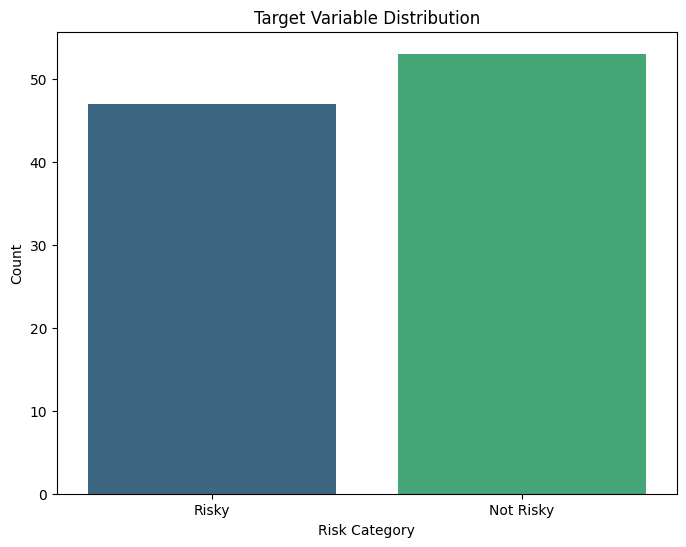

In [1300]:
# Visualizing the Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Risk_Category', data=data, palette='viridis')
plt.title('Target Variable Distribution')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.show()

# **Balancing the Target Variable**

In [1301]:
# Handling the imbalance dataset

# Suppressing the FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Handling imbalanced dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original dataset size:", X.shape)
print("Resampled dataset size:", X_resampled.shape)

Original dataset size: (100, 52)
Resampled dataset size: (106, 52)


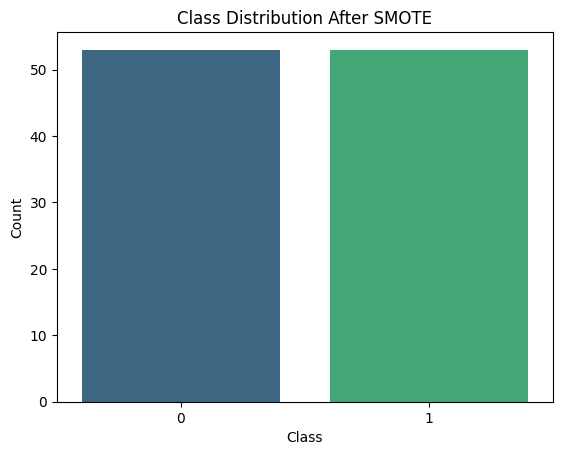

In [1302]:
# Plotting class distribution after SMOTE
sns.countplot(x=y_resampled, palette="viridis")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [1303]:
# Displaying the dataset shape after applying the SMOTE
print(f"Shape of X_resampled: {X_resampled.shape}")
print(f"Shape of y_resampled: {y_resampled.shape}")

Shape of X_resampled: (106, 52)
Shape of y_resampled: (106,)


In [1304]:
# Displaying the Columns in X
print("Columns in X Resampled:")
print(X_resampled.columns)

Columns in X Resampled:
Index(['Import_Frequency', 'Import_Quantity (kg)', 'Past_Violations',
       'Chemical_Name_Chlorates and perchlorates; bromates and perbromates; iodates and periodates',
       'Chemical_Name_Chlorine',
       'Chemical_Name_Cyanides and cyanide oxides: Of sodium',
       'Chemical_Name_Cyanides and cyanide oxides: Other',
       'Chemical_Name_Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts',
       'Chemical_Name_Halides and halide oxides of non-metals',
       'Chemical_Name_Hydrogen peroxide, whether or not solidified with urea',
       'Chemical_Name_Iodine',
       'Chemical_Name_Mineral or chemical fertilizers, nitrogenous',
       'Chemical_Name_Nitric acid; sulphonitric acids',
       'Chemical_Name_Sulphuric acid; oleum', 'Country_of_Origin_Canada',
       'Country_of_Origin_China', 'Country_of_Origin_France',
       'Country_of_Origin_Germany', 'Country_of_Origin_India',
       'Country_of_Origin_Japan', 'Country_of_Ori

In [1305]:
# Standardizing the features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

In [1306]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, stratify = y_resampled, random_state=42)

In [1307]:
# Displaying the Dataset Information
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Import_Frequency         100 non-null    int64 
 1   Import_Quantity (kg)     100 non-null    int64 
 2   Chemical_Name            100 non-null    object
 3   HS Code                  100 non-null    object
 4   Country_of_Origin        100 non-null    object
 5   Importation_Description  100 non-null    object
 6   Compliance_History       100 non-null    object
 7   Past_Violations          100 non-null    int64 
 8   Financial_Stability      100 non-null    object
 9   Risk_Category            100 non-null    object
dtypes: int64(3), object(7)
memory usage: 7.9+ KB
None


# **Model Training**

# **Model Based on Gradient Boost**

In [1308]:
# Initializing the GradientBoostingClassifier with additional options
model = GradientBoostingClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    validation_fraction=0.1,
    n_iter_no_change=10,
    warm_start=True,
    max_leaf_nodes=31,
    verbose=1
)

# Training the model on the training data
model.fit(X_train, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3518          -0.0121            3.08s
         2           1.3375           0.0306            3.67s
         3           1.3225           0.0320            3.21s
         4           1.2890          -0.0415            3.02s
         5           1.2876           0.0589            2.87s
         6           1.2583           0.0004            2.82s
         7           1.2566           0.0726            2.75s
         8           1.2263          -0.0215            2.76s
         9           1.2322           0.1159            2.74s
        10           1.1613          -0.1922            2.70s
        20           0.9861          -0.1036            2.74s
        30           0.8744          -0.0083            2.54s
        40           0.7537          -0.1302            2.59s
        50           0.7099          -0.0503            2.75s


GradientBoostingClassifier(learning_rate=0.05, max_depth=4, max_features='sqrt',
                           max_leaf_nodes=31, n_estimators=1000,
                           n_iter_no_change=10, random_state=42, subsample=0.8,
                           verbose=1, warm_start=True)

In [1309]:
# Save the model and preprocessors
joblib.dump(model, "gradient_boost_classifier.pkl")
joblib.dump(encoder, "encoder.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [1310]:
# Predictions
y_pred = model.predict(X_test)

In [1311]:
# Calculating Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy:.2f}")

Optimized Model Accuracy: 0.59


In [1312]:
# Generating the Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.60      0.55      0.57        11

    accuracy                           0.59        22
   macro avg       0.59      0.59      0.59        22
weighted avg       0.59      0.59      0.59        22



In [1313]:
# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-validation accuracy: {cv_scores.mean() * 100:.2f}%")

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3364          -0.0068           15.23s
         2           1.3117           0.0921           10.09s
         3           1.2847           0.0144            7.47s
         4           1.2277          -0.0120            6.49s
         5           1.2008           0.0429            5.61s
         6           1.1957           0.0650            5.03s
         7           1.1642           0.0389            4.64s
         8           1.1371           0.0074            4.44s
         9           1.0880          -0.0082            4.19s
        10           1.0757           0.0837            3.99s
        20           0.8585          -0.0798            3.01s
        30           0.7132           0.0699            2.74s
        40           0.6172           0.0691            2.93s
        50           0.4954           0.0847            3.18s
        60           0.4168          -0.0423            3.31s
       

In [1314]:
# Classification Report
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.60      0.55      0.57        11

    accuracy                           0.59        22
   macro avg       0.59      0.59      0.59        22
weighted avg       0.59      0.59      0.59        22



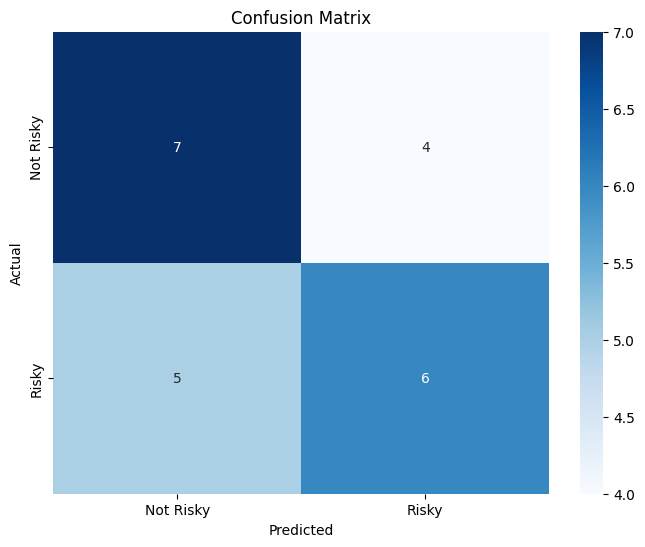

In [1315]:
# Plotting the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Explainable AI - XAI**

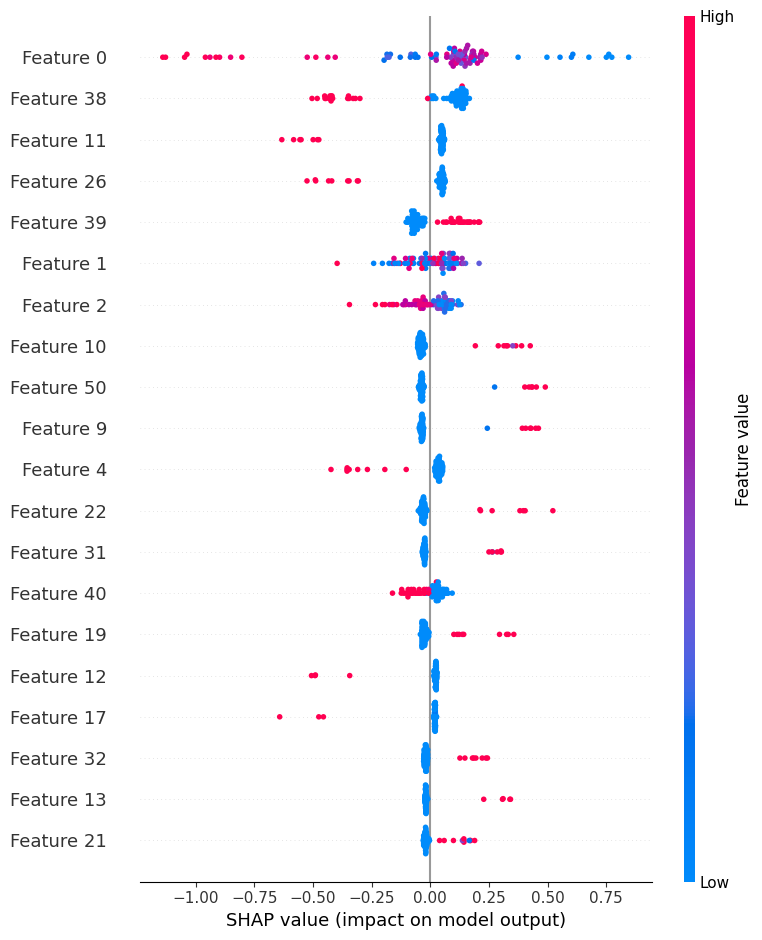

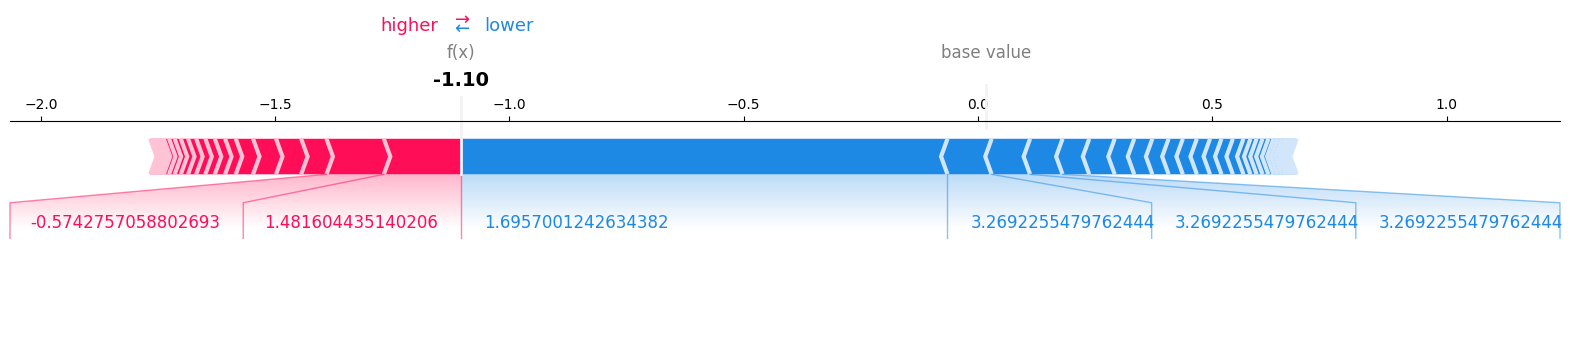

In [1316]:
# SHAP
# Initialize SHAP Explainer
explainer = shap.Explainer(model, X_train)

# SHAP Summary Plot (Global Feature Importance)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

# SHAP Force Plot for a specific instance (Local Explanation)
shap.initjs()
shap.force_plot(shap_values[0], matplotlib=True)

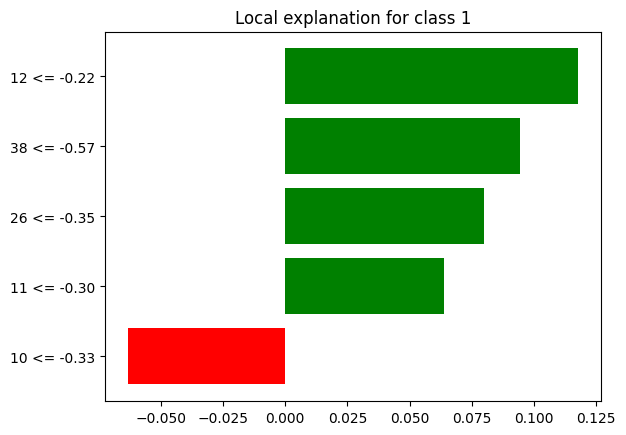

In [1317]:
# LIME
# Initialize LIME Explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    mode="classification",
    training_labels=y_train,
    feature_names=X_train.columns if hasattr(X_train, 'columns') else range(X_train.shape[1]),  # Add a check for column names
    class_names=model.classes_,
    discretize_continuous=True
)

# Choose an instance from the test set to explain
instance = X_test[0]

# Explain the instance with LIME
explanation = explainer_lime.explain_instance(instance, model.predict_proba, num_features=5)

# Plot the explanation for the instance
explanation.as_pyplot_figure()

plt.show()

# **Model Saving**

In [1318]:
# Saving the Trained Model and the Scaler
joblib.dump(model, '/content/drive/MyDrive/risk-prediction/Models/Gradient_Boost_Model.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/risk-prediction/Scalers/Gradient_Boost_Scaler.pkl')
joblib.dump(encoder, "/content/drive/MyDrive/risk-prediction/Models/encoder.pkl")

['/content/drive/MyDrive/risk-prediction/Models/encoder.pkl']

# **Prediction**

In [1324]:
import pandas as pd
import joblib

# Function to make predictions
def predict_risk_category(input_data):
    """
    input_data: dict containing feature values.
    """
    try:
        # Load trained model and preprocessors
        model = joblib.load("gradient_boost_classifier.pkl")
        encoder = joblib.load("encoder.pkl")
        scaler = joblib.load("scaler.pkl")
        label_encoder = joblib.load("label_encoder.pkl")

        # Define the categorical and numerical feature columns
        categorical_cols = ["Chemical_Name", "Country_of_Origin", "Importation_Description", "Compliance_History", "Financial_Stability", "HS Code"]
        numerical_cols = ["Import_Frequency", "Past_Violations", "Import_Quantity (kg)"]

        # Convert input into DataFrame
        input_df = pd.DataFrame([input_data])

        # Handle missing values by filling with default values
        input_df[categorical_cols] = input_df[categorical_cols].fillna('Unknown')
        input_df[numerical_cols] = input_df[numerical_cols].fillna(0)

        # Ensure that categorical columns are of the correct type (string)
        input_df[categorical_cols] = input_df[categorical_cols].astype(str)

        # Process categorical features
        # Pass the DataFrame to the encoder (input_df is a DataFrame now)
        cat_features = encoder.transform(input_df[categorical_cols])
        cat_df = pd.DataFrame(cat_features, columns=encoder.get_feature_names_out(categorical_cols))

        # Process numerical features
        num_features = scaler.transform(input_df[numerical_cols])
        num_df = pd.DataFrame(num_features, columns=numerical_cols)

        # Combine processed features
        processed_input = pd.concat([num_df, cat_df], axis=1)

        # Make prediction
        prediction = model.predict(processed_input)
        predicted_category = label_encoder.inverse_transform(prediction)[0]
        return predicted_category

    except ValueError as e:
        print(f"Error during categorical feature transformation: {e}")
    except TypeError as e:
        print(f"Data type issue: {e}")
    except Exception as e:
        print(f"Error in prediction process: {e}")

    return None

# Example usage
example_input = {
    "Import_Frequency": 40,
    "HS Code": 280700,
    "Past_Violations": 10,
    "Import_Quantity (kg)": 5000,
    "Chemical_Name": "Chlorine",
    "Country_of_Origin": "India",
    "Importation_Description": "Petroleum refining & chemical synthesis",
    "Compliance_History": "Medium",
    "Financial_Stability": "Poor"
}

predicted_category = predict_risk_category(example_input)

if predicted_category:
    print(f"Predicted Risk Category: {predicted_category}")
else:
    print("Prediction failed.")


Error during categorical feature transformation: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Chemical_Name_Chlorates and perchlorates; bromates and perbromates; iodates and periodates
- Chemical_Name_Chlorine
- Chemical_Name_Cyanides and cyanide oxides: Of sodium
- Chemical_Name_Cyanides and cyanide oxides: Other
- Chemical_Name_Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts
- ...

Prediction failed.


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
